In [32]:
from dateutil.parser import parse
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss
import scipy

In [2]:
data = pd.read_csv('../data/ts_data.csv', parse_dates=['date'], index_col='date')

In [3]:
data.head()

,value
date,
1991-01-07,3.526591
1991-01-08,3.180891
1991-01-09,3.252221
1991-01-10,3.611003
1991-01-11,3.565869


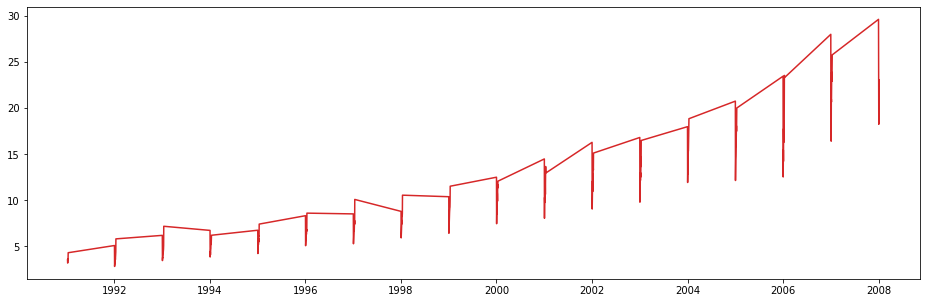

In [4]:
# Draw plot

plt.figure(figsize=(16,5))
plt.plot(data.index, data.value, color='tab:red')
plt.show()

# Seasonal plot of a Time Series

In [5]:
data = pd.read_csv('../data/ts_data_2.csv', parse_dates=['date'])
#data.reset_index(inplace=True)


In [6]:
# prepare data

data['year'] = [d.year for d in data.date]
data['month'] = [d.strftime('%b') for d in data.date]
years = data['year'].unique()


In [7]:
data.head()

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov


In [8]:
data

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov
...,...,...,...,...
199,2008-02-01,21.654285,2008,Feb
200,2008-03-01,18.264945,2008,Mar
201,2008-04-01,23.107677,2008,Apr
202,2008-05-01,22.912510,2008,May


In [9]:
# prep colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

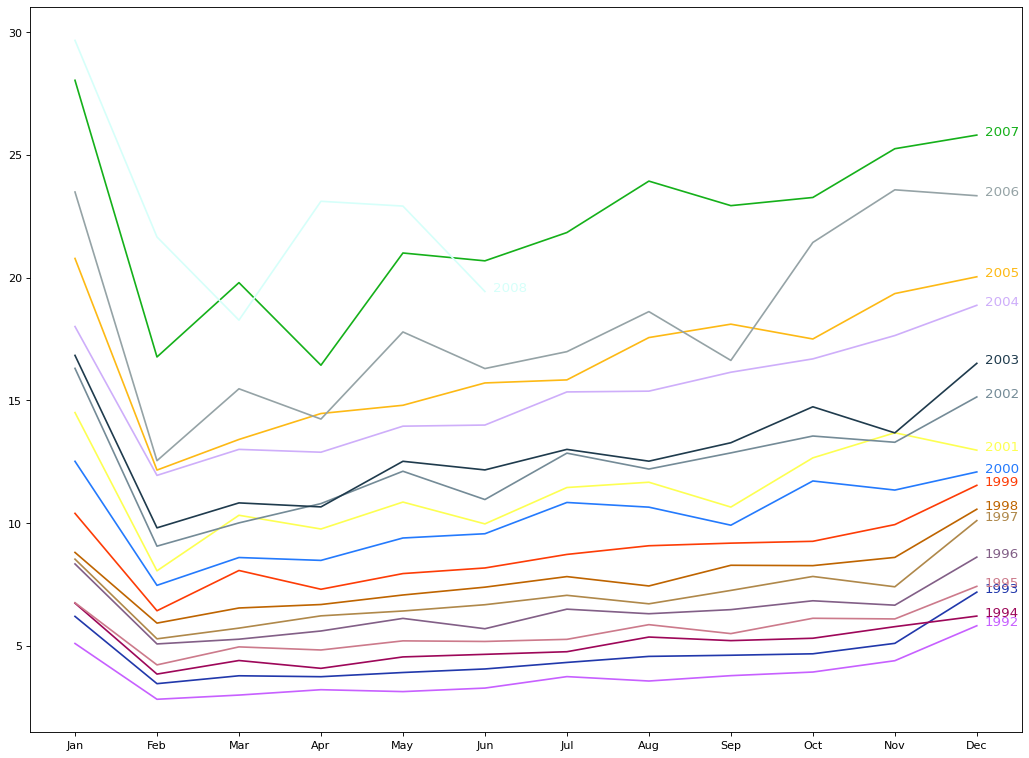

In [10]:
# Draw plot
plt.figure(figsize=(16,12), dpi = 80)
for i, y in enumerate(years):
    if i >0:
        plt.plot('month', 'value', data=data.loc[data.year==y,:], color=mycolors[i],label=y)
        plt.text(data.loc[data.year==y, :].shape[0]-.9, data.loc[data.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

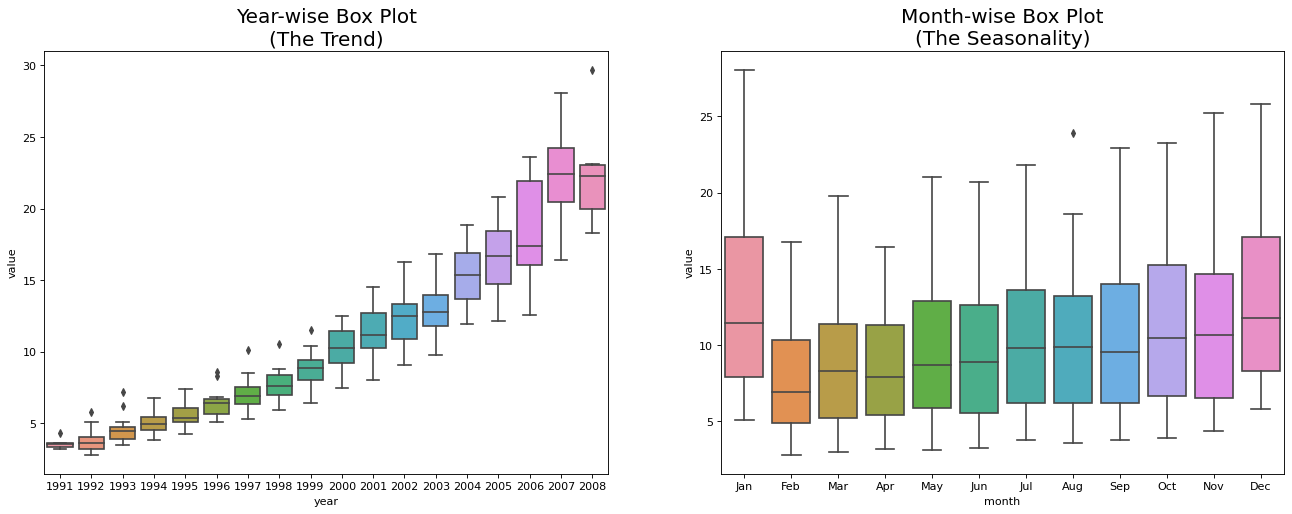

In [11]:
# Import Data
df = pd.read_csv('../data/ts_data_2.csv', parse_dates=['date'])
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

## 5. Patterns in a time series

<AxesSubplot:title={'center':'Trend and Seasonality'}, xlabel='date'>

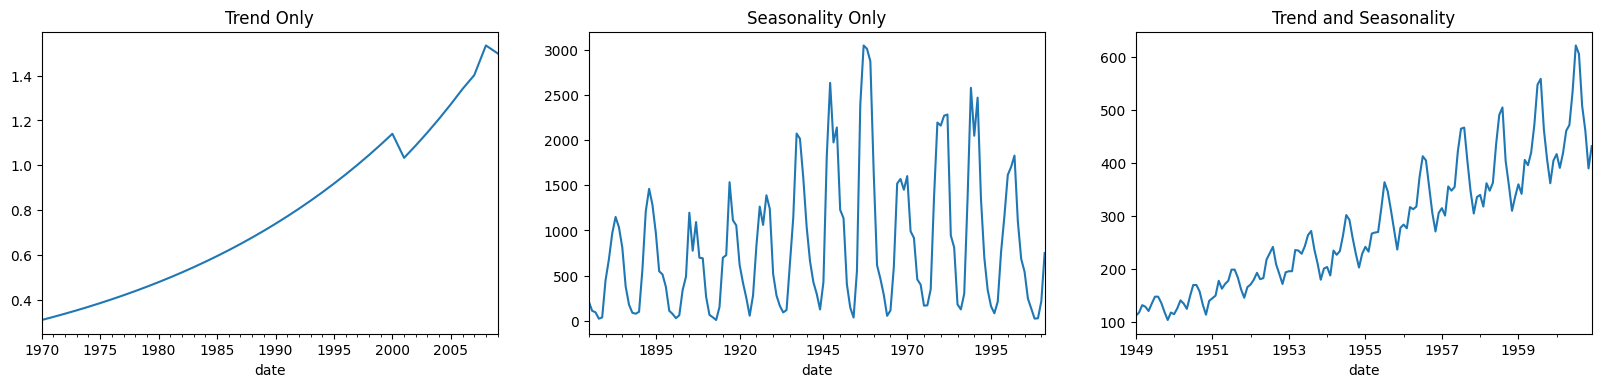

In [12]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

## 6. Additive and multiplicative time series

## 7. How to decompose a time series into its components?

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

In [16]:
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


Text(0.5, 0.98, 'Additive  Decompose')

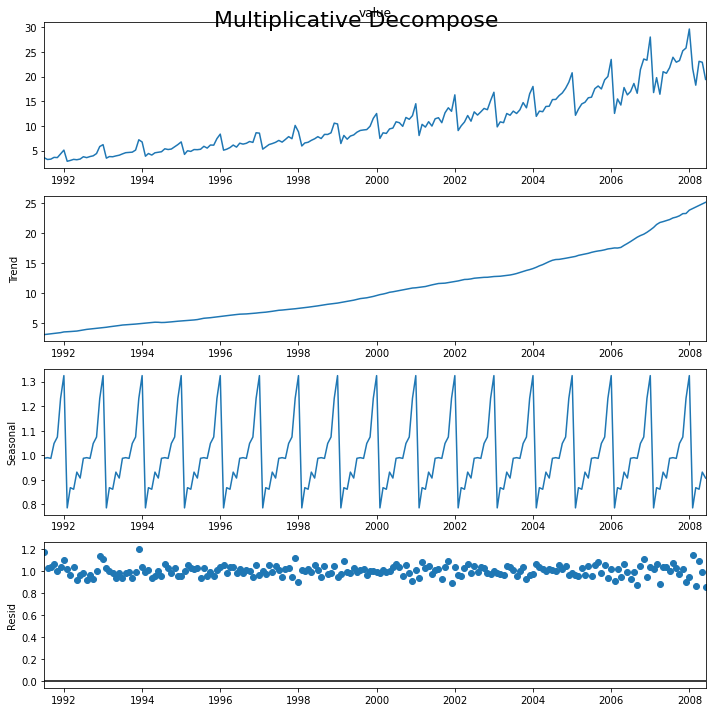

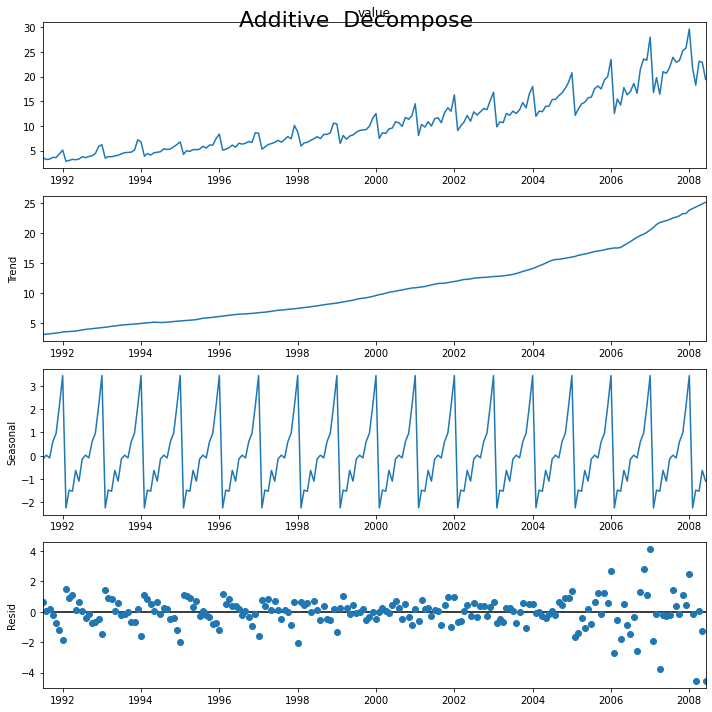

In [20]:
# Multiplicative Decomposition
result_mul = seasonal_decompose(df.value, model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df.value, model='additive', extrapolate_trend='freq')

# plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive  Decompose', fontsize=22)

In [21]:
# Extract the components - 
# Actual Value = Product of (Seasonal * Trend* Resid)

df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seasonal','trend','resid','actual_values']
df_reconstructed.head()

,seasonal,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


## 10. How to test for stationary?

In [26]:
result_addfuller = adfuller(df.value.values, autolag='AIC')
print(f'ADF statistics: {result_addfuller[0]}')
print(f'p-value: {result_addfuller[1]}')

for key, value in result_addfuller[4].items():
    print('Critical Vales:')
    print(f'   {key},{value}')

ADF statistics: 3.14518568930675
p-value: 1.0
Critical Vales:
   1%,-3.465620397124192
Critical Vales:
   5%,-2.8770397560752436
Critical Vales:
   10%,-2.5750324547306476


In [29]:
result_kpss = kpss(df.value.values, regression='c')
print(f'KPSS statistics: {result_kpss[0]}')
print(f'p-value: {result_kpss[1]}')

for key, value in result_kpss[3].items():
    print('Critical Vales:')
    print(f'   {key},{value}')

KPSS statistics: 2.0131256386303322
p-value: 0.01
Critical Vales:
   10%,0.347
Critical Vales:
   5%,0.463
Critical Vales:
   2.5%,0.574
Critical Vales:
   1%,0.739


<AxesSubplot:title={'center':'Random White Noise'}>

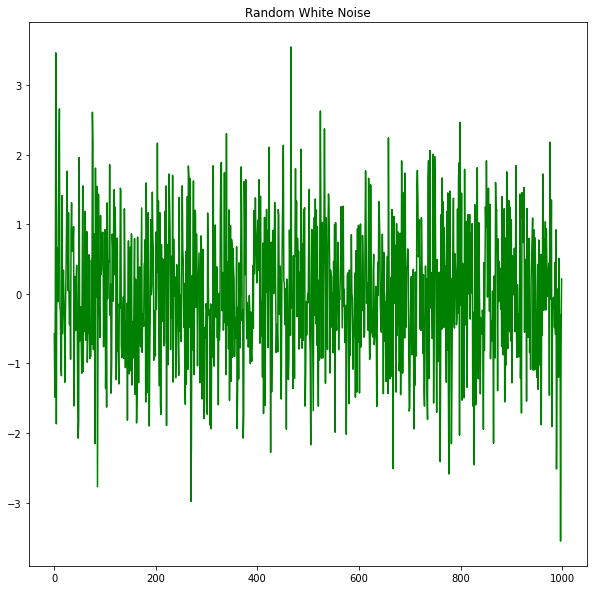

In [31]:
## White Noise

randvals = np.random.randn(1000)
pd.Series(randvals).plot(title='Random White Noise', color='g')

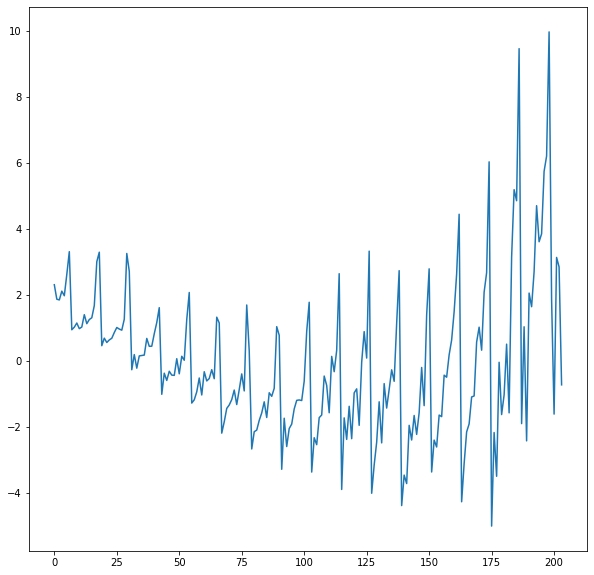

In [33]:
# Using Scipy: Subtract the line of best fit

from scipy import signal
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

detrend = signal.detrend(df.value.values)
plt.plot(detrend)


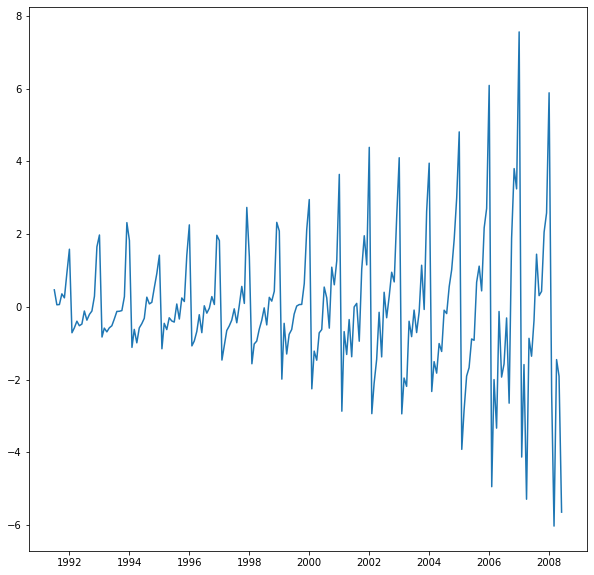

In [39]:
# Using statmodel: Subracting the trned component

from statsmodels.tsa.seasonal import seasonal_decompose
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
result_mul = seasonal_decompose(df['value'], model = 'multiplicative', extrapolate_trend='freq')
# result_mul = seasonal_decompose(df['value'], model = 'multiplicative', extrapolate_trend='freq')
detrended = df.value.values - result_mul.trend
plt.plot(detrended)

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

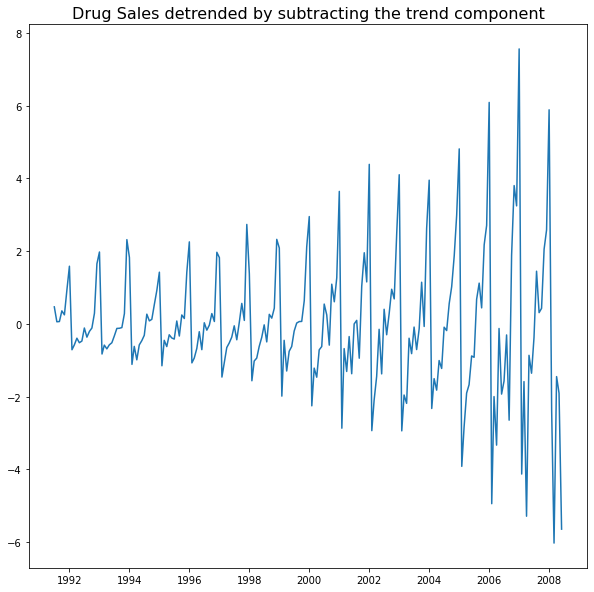

In [36]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
detrended = df.value.values - result_mul.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

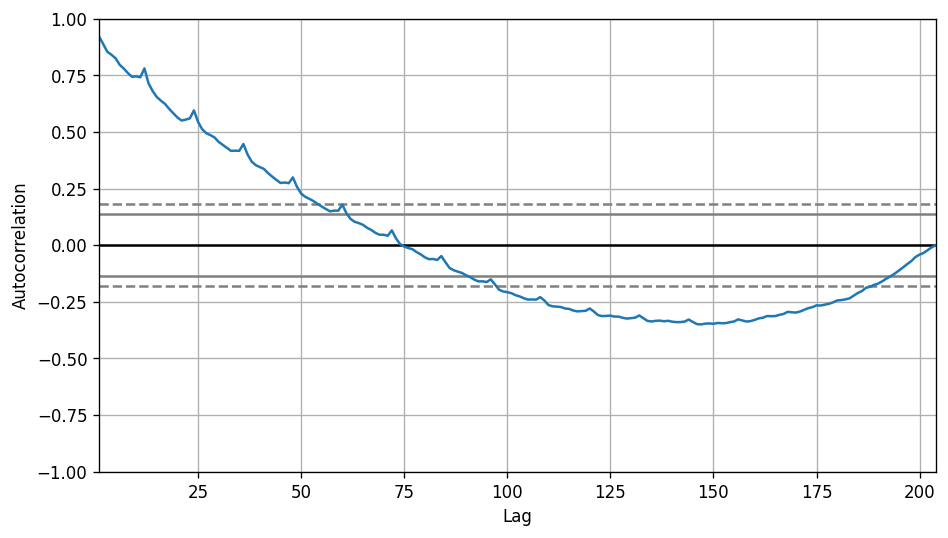

In [40]:
from pandas.plotting import autocorrelation_plot
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.value.tolist())

ValueError: Found input variables with inconsistent numbers of samples: [100, 204]

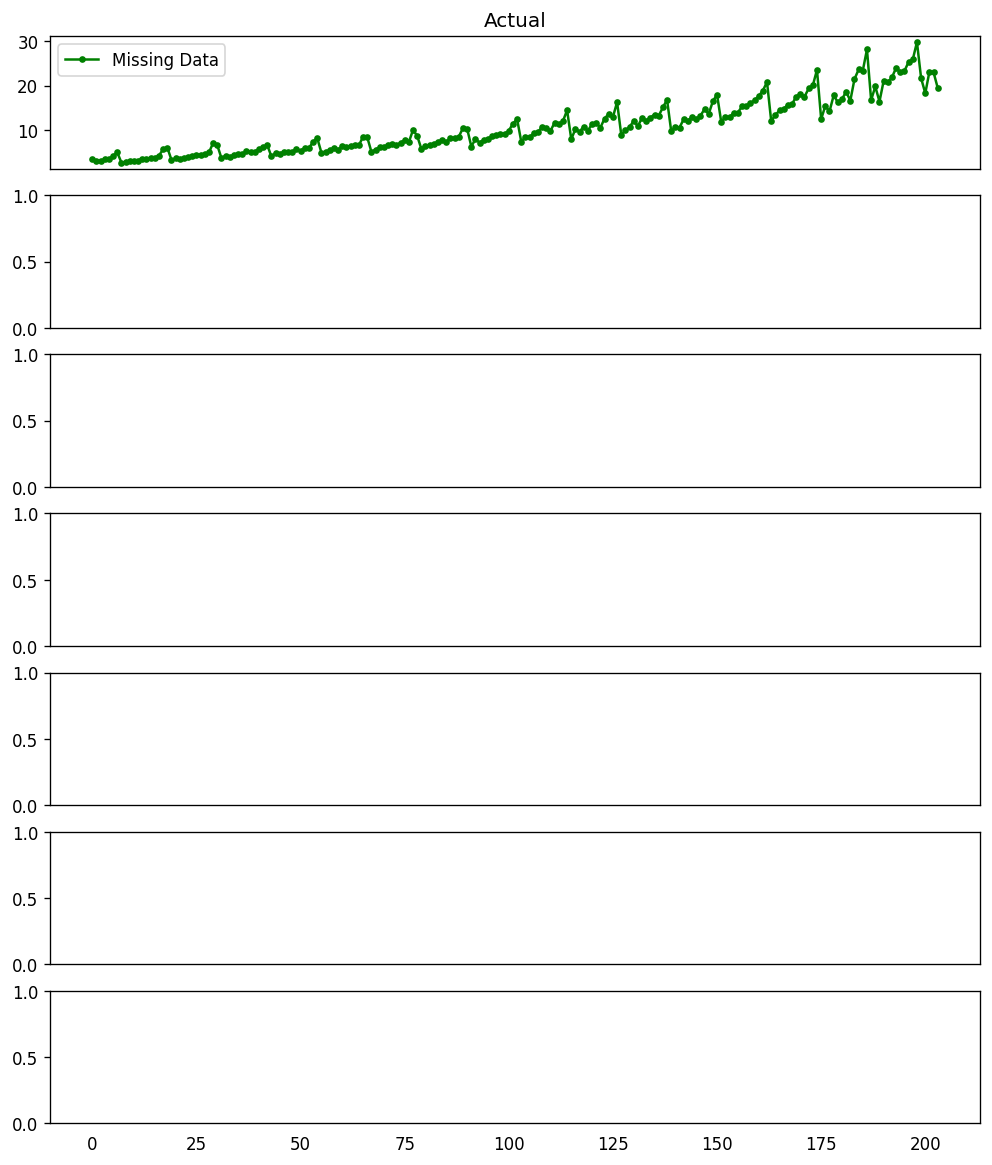

In [47]:
# # Generate dataset
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date').head(100)
# df = pd.read_csv('datasets/a10_missings.csv', parse_dates=['date'], index_col='date')

fig, axes = plt.subplots(7, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
# df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Forward Fill --------------------------
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")

## 3. Backward Fill -------------------------
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='firebrick', style=".-")

## 4. Linear Interpolation ------------------
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset = ['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='brown', style=".-")

## 5. Cubic Interpolation --------------------
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', style=".-")

# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

df['knn_mean'] = knn_mean(df.value.values, 8)
error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[5], label='KNN Mean', color='tomato', alpha=0.5, style=".-")

## 7. Seasonal Mean ----------------------------
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[6], label='Seasonal Mean', color='blue', alpha=0.5, style=".-")